<a href="https://colab.research.google.com/github/Leo-Vincenzi/PUC-MVV_1/blob/main/MVP_1_Leo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pontifícia Universidade Católica - PUC-Rio
## Curso de Análise de Dados e Boas Práticas
### Aluno: Leonardo Braga De Vincenzi
#### MVP Sprint 1 (Dez/2023)

## 1. Definição do Problema

**Qual o objetivo desse MVP?**

O desafio desse projeto acadêmico é, em poucas palavras, a busca do aumento das vendas e da lucratividade de uma empresa comercial varejista.

**Como fazer isso?**

A partir de uma base de dados dessa empresa, por meio da análise desses dados, obteremos insights e informações que podem ser importantes e necessárias para melhorar a tomada de decisão gerencial em busca desse objetivo.

**Sobre o dataset utilizado:**

O dataset usado neste projeto será o **Customer Shopping Trends Dataset**. Ele oferece informações a respeito do comportamento do consumidor e os seus padrões de compra.

Este conjunto de dados captura uma gama de atributos do cliente que inclui idade, sexo, histórico de compras, métodos de pagamento, frequência de compras e avaliações de feedback.

Além disso, possui dados sobre o tipo de itens adquiridos, épocas de compras preferidas e interações com ofertas promocionais.

Compreender as preferências e tendências do cliente é fundamental para que as empresas entenderem melhor o seu nicho de mercado, oferecendo novos produtos, desenvolvendo estratégias de marketing eficazes e melhorando a experiência geral do cliente.

A análise desses dados pode auxiliar as empresas ligadas ao comércio varejista na tomada de decisões gerenciais mais rápidas e precisas, otimizando a ofertas de produtos, aumentando a satisfação do cliente, e alinhando suas estratégias de vendas com as preferências dos consumidores.

Com uma coleção de 3.900 registros, este dataset foi criado com objetivos acadêmicos pelo ChatGPT.

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

**Informações sobre os atributos:**

01. **Customer ID** - Identificador exclusivo do cliente (chave primária)
(1, ...,3900)
02. **Age** - Idade do Cliente (18, ...,70)
03. **Gender** - Gênero do Cliente (Male, Female)
04. **Item Purchased** - Item comprado pelo cliente (Backpack, Belt, Blouse,Boots, Coat, Dress, Gloves, Handbag, Hat, Hoodie, Jacket, Jeans, Jewelry, Pants,Sandals, Scarf, Shirt, Shoes, Shorts, Skirt, Sneakers, Socks, Sunglasses, Sweater, T-shirt)
05. **Category** - Categoria do bem adquirido (Acessories, Clothing, Outerware, Footwear)
06. **Purchase Amount(USD)** - Valor de compra (20, ...,100)
07. **Location** - Local onde a compra foi realizada (Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming)
08. **Size** - Tamanho do item adquirido (L,M,S,XL)
09. **Color** - Cor do item adquirido (Beige, Black, Blue, Brown, Charcoal, Cyan, Gold, Gray, Green, Indigo, Lavender, Magenta, Maroon, Olive, Orange, Peach, Pink, Purple, Red, Silver, Teal, Turquoise, Violet, White, Yellow)
10. **Season** - Estação na qual a compra foi feita (Fall, Spring, Summer, Winter)
11. **Review Rating** - Nota dada pelo cliente para o item comprado (25, ...,50)
12. **Subscription Status** - Indica se o cliente possui cartão de fidelidade com a loja (Yes, No)
13. **Shipping Type** - Tipo de envio da compra escolhido pelo ciente (2-Day Shipping, Express, Free Shipping, Next Day Air, Standard, Store Pickup)
14. **Discount Applied** - Indica se foi aplicado um desconto durante a compra (Yes, No)
15. **Promo Code Used** - Indica se foi usado um código promocional durante a compra (Yes, No)
16. **Previous Purchases** - Número total de vendas concluídas pelo cliente, excluindo a transação atual (1, ...,50)
17. **Prefered Payment Method** - Método de pagamento escolhido pelo cliente (Bank Transfer, Cash, Credit Card, Debit Card, PayPal, Venmo)
18. **Frequency of Purchase** - Frequência de compras feita pelo cliente
(Annually, Bi-Weekly, Every 3 Mounths, Fortynightly, Mounthly, Quarterly, Weekly)


Importando bibliotecas e definindo padrão de cores do MVP.

In [ ]:
# Imports (bibliotecas)
#
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Cores
#
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [ ]:
# Configuração para não exibir os warnings
#
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar a biblioteca Pandas (Python Data Analysis Library) para carregar de um arquivo .csv disponível online.

Aqui teremos a primeira visualização do dataset.

In [ ]:
# Carrega arquivo .csv usando Pandas (pd) e usando uma URL

# Informa a URL de importação do dataset
# url_dados = "https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends2.csv"

# Informa o cabeçalho das colunas
# colunas1 = ['Customer ID','Age','Gender','Item Purchased','Category','Purchase Amount (USD)','Location','Size','Color','Season','Review Rating','Subscription Status','Shipping Type','Discount Applied','Promo Code Used','Previous Purchases','Payment Method','Frequency of Purchase']
# colunas2 = ['ID','Idade','Sexo','Item','Categoria','Valor','Local','Tam','Cor','Estacao','Nota','Fidelidade','Envio','Desconto','Promo','Anteriores','Metodo Pagto','Freq compras']

# Lê o arquivo utilizando as colunas informadas
# dataset = pd.read_csv(url_dados, names=colunas2, skiprows=1, delimiter=',')


# Carrega arquivo .csv usando Pandas (pd) e usando uma URL
#
dataset = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVV_1/main/shopping_trends2.csv")
dataset.sample(5)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
895,896,40,Male,Hat,Accessories,69,Mississippi,XL,Olive,Spring,47,Yes,Next Day Air,Yes,Yes,33,Debit Card,Quarterly
1646,1647,58,Male,Handbag,Accessories,77,Nebraska,S,Silver,Summer,37,No,Standard,Yes,Yes,20,Credit Card,Every 3 Months
1650,1651,60,Male,Scarf,Accessories,36,Arkansas,M,Silver,Winter,34,No,Next Day Air,Yes,Yes,46,Venmo,Fortnightly
624,625,55,Male,Pants,Clothing,87,South Carolina,XL,Pink,Fall,34,Yes,Express,Yes,Yes,21,Venmo,Annually
1314,1315,42,Male,Boots,Footwear,67,Missouri,S,Magenta,Summer,34,No,Free Shipping,Yes,Yes,49,Venmo,Annually


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Com o dataset carregado, iremos explorá-lo um pouco.

Vamos iniciar examinando as dimensões do dataset, suas informações, distribuição e alguns exemplos de linhas.

Podemos verificar que o dataset tem 3900 linhas (entradas) de 18 colunas.

In [ ]:
# Mostra dimensões (linhas e colunas) do arquivo carregado
#
dataset.shape

(3900, 18)

Checaremos o número de colunas do dataset.



In [ ]:
# Mostra o nome dos atributos
#
dataset.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Mostraremos a estrutura do arquivo.

In [ ]:
# Mostra informações do arquivo carregado
#
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Customer ID             3900 non-null   int64 
 1   Age                     3900 non-null   int64 
 2   Gender                  3900 non-null   object
 3   Item Purchased          3900 non-null   object
 4   Category                3900 non-null   object
 5   Purchase Amount (USD)   3900 non-null   int64 
 6   Location                3900 non-null   object
 7   Size                    3900 non-null   object
 8   Color                   3900 non-null   object
 9   Season                  3900 non-null   object
 10  Review Rating           3900 non-null   int64 
 11  Subscription Status     3900 non-null   object
 12  Shipping Type           3900 non-null   object
 13  Discount Applied        3900 non-null   object
 14  Promo Code Used         3900 non-null   object
 15  Prev

Mostraremos as primeiras 10 linhas do dataset.

In [ ]:
# Mostra as 10 primeiras linhas
#
dataset.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,31,Yes,Express,Yes,Yes,14,Credit Card,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,31,Yes,Express,Yes,Yes,2,Bank Transfer,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,31,Yes,Free Shipping,Yes,Yes,23,Cash,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,35,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,27,Yes,Free Shipping,Yes,Yes,31,Cash,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,29,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,32,Yes,Free Shipping,Yes,Yes,49,Debit Card,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,32,Yes,Free Shipping,Yes,Yes,19,Debit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,26,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,48,Yes,2-Day Shipping,Yes,Yes,4,PayPal,Quarterly


Essas são as 10 últimas linhas do dataset.

In [ ]:
# Mostra as 10 últimas linhas
#
dataset.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,26,No,Standard,No,No,33,Credit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,47,No,Free Shipping,No,No,6,Cash,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,35,No,Standard,No,No,5,Bank Transfer,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,33,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,39,No,2-Day Shipping,No,No,44,Cash,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,42,No,2-Day Shipping,No,No,32,Cash,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,45,No,Store Pickup,No,No,41,PayPal,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,29,No,Standard,No,No,24,Credit Card,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,38,No,Express,No,No,24,PayPal,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,31,No,Store Pickup,No,No,33,Bank Transfer,Quarterly


Verificaremos os tipos dos atributos das 18 colunas do dataset e analizaremos suas possíveis conversões.

In [ ]:
# Verifica o tipo de cada atributo
#
dataset.dtypes

Customer ID                int64
Age                        int64
Gender                    object
Item Purchased            object
Category                  object
Purchase Amount (USD)      int64
Location                  object
Size                      object
Color                     object
Season                    object
Review Rating              int64
Subscription Status       object
Shipping Type             object
Discount Applied          object
Promo Code Used           object
Previous Purchases         int64
Payment Method            object
Frequency of Purchases    object
dtype: object

Realizaremos um resumo estatístico do dataset:

In [ ]:
# Realiza um resumo estatístico (média, desvio padrão, mínimo, máximo e os quartis)
#
dataset.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,37.499487,25.351538
std,1125.977353,15.207589,23.685392,7.162228,14.447125
min,1.000000,18.000000,20.000000,25.000000,1.000000
25%,975.750000,31.000000,39.000000,31.000000,13.000000
50%,1950.500000,44.000000,60.000000,37.000000,25.000000
75%,2925.250000,57.000000,81.000000,44.000000,38.000000
max,3900.000000,70.000000,100.000000,50.000000,50.000000


Verificaremos se há algum valor NULL (nulo) no dataset.

In [ ]:
# Verifica se existe algum atributo com o valor NULL (0 = não)
#
dataset.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Não existe atributo com valor NUL no dataset.

Agora vamos verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento, caso necessário.

In [ ]:
# Distribuição das classes (0 = desbalanceada, 1 = balanceada)
#
#dataset.groupby('Customer ID').size()
#dataset.groupby('Age', ).size()
#dataset.groupby('Purchase Amount (USD)').size()
#dataset.groupby( 'Review Rating').size()
#dataset.groupby('Previous Purchases').size()

Estão todos balanceados.

Faremos um gráfico "Scatter plot" cruzando as variáveis "Idade" vs "Vendas Anteriores" para ver se tem alguma relação entre elas.

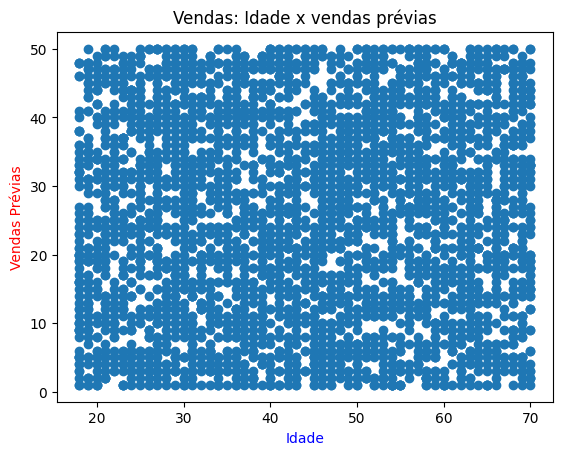

In [ ]:
# Plotando gráfico de idade x vendas prévias
#
plt.scatter(dataset['Age'], dataset['Previous Purchases'])

#incluindo titulo do gráfico e rótulos dos eixos
#
plt.title('Vendas: Idade x vendas prévias')
plt.xlabel('Idade', color='blue')
plt.ylabel('Vendas Prévias', color='red')
plt.show()


Verificamos que não é possível determinar qualquer relação entre eles.

Faremos um gráfico "Scatter plot" cruzando as variáveis "Avaliação" vs "Valor da compra (USD)" para ver se tem alguma relação entre elas.

In [ ]:
# Plotando gráfico de "Avaliação" vs "Valor da Compra (USD)"
#
plt.scatter(dataset['Review Rating'], dataset['Purchase Amount (USD)'])

#incluindo titulo do gráfico e rótulos dos eixos
#
plt.title('Vendas: Avaliação" vs "Valor da Compra (USD)')
plt.xlabel('Review Rating', color='green')
plt.ylabel('Purchase Amount (USD)', color='yellow')
plt.show()

### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo numérico do dataset.

O histograma ilustra como uma determinada amostra de dados está distribuída, dispondo visualmente as informações de modo a facilitar a visualização da sua distribuição. Ele busca ressaltar a localização do valor central, e da distribuição dos dados em torno deste valor.

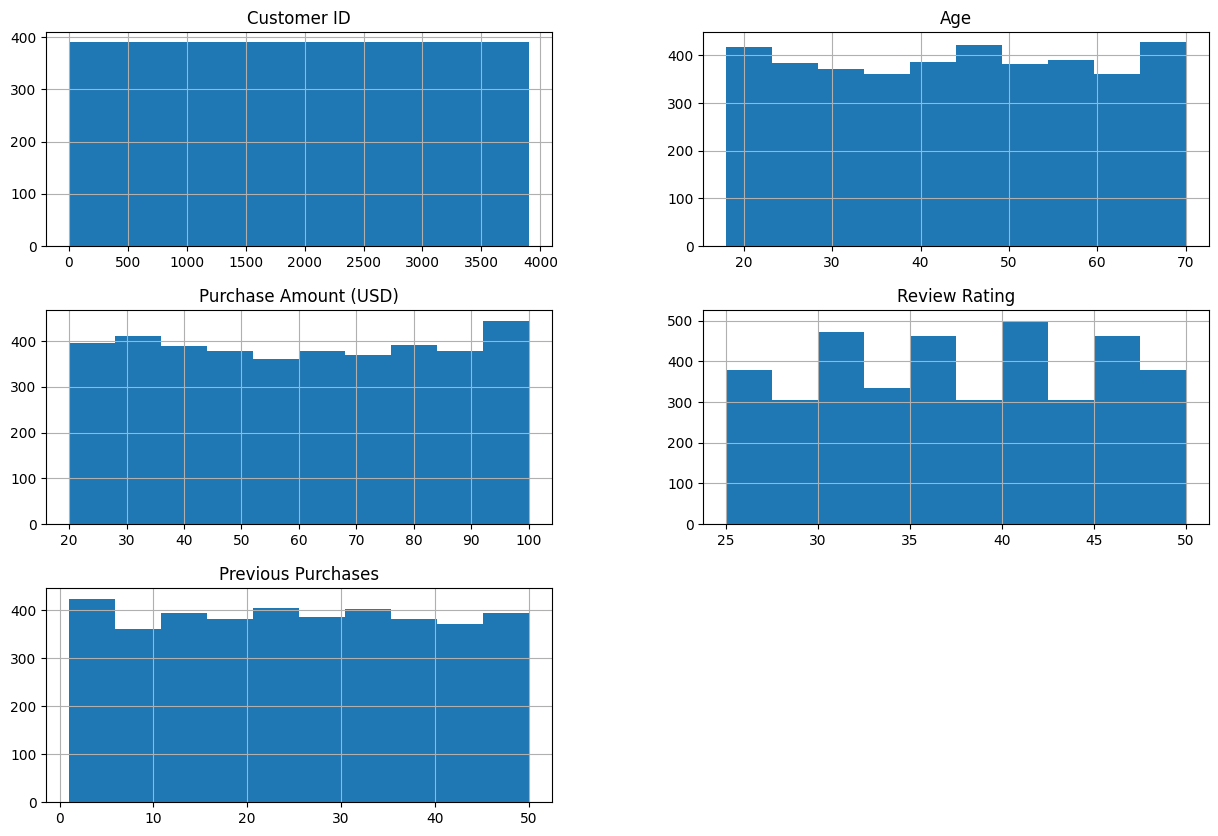

In [ ]:
# Plotando o histograma
#
dataset.hist(figsize = (15,10))
plt.show()

Analisando os grágicos verificamos que todos os 5 atributos numéricos não possuem um valor central, já que suas distribuições são todas uniformes.

Faremos agora o Gráfico de Densidade ou Density Plot, que é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

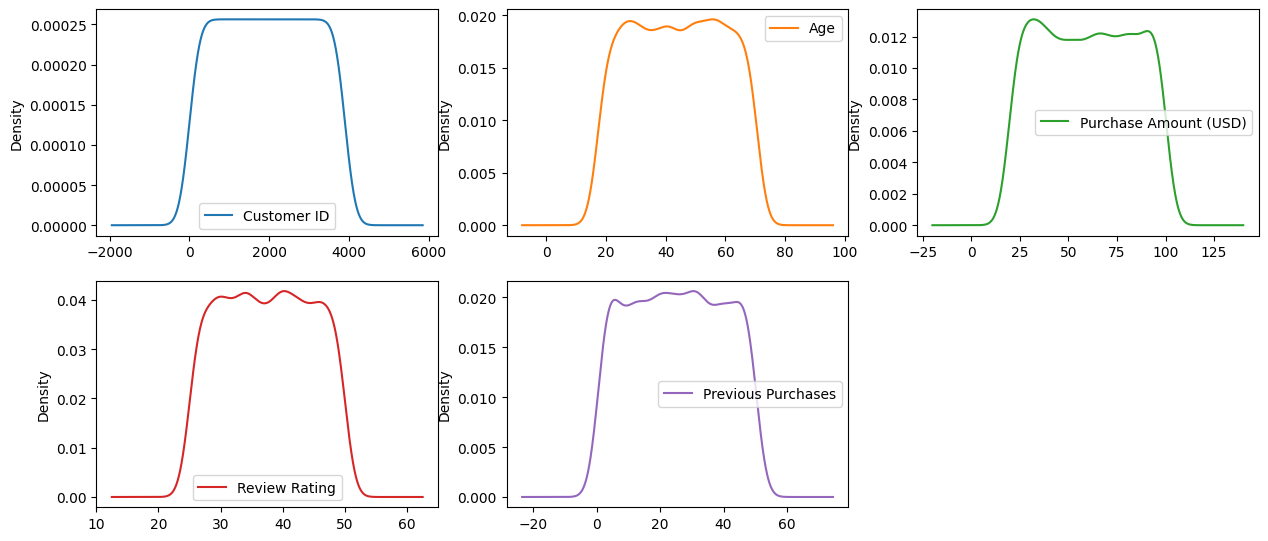

In [ ]:
# Density Plot
#
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Verificamos que todos os atributos têm uma distribuição semelhante, ou seja, sem valor central.

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

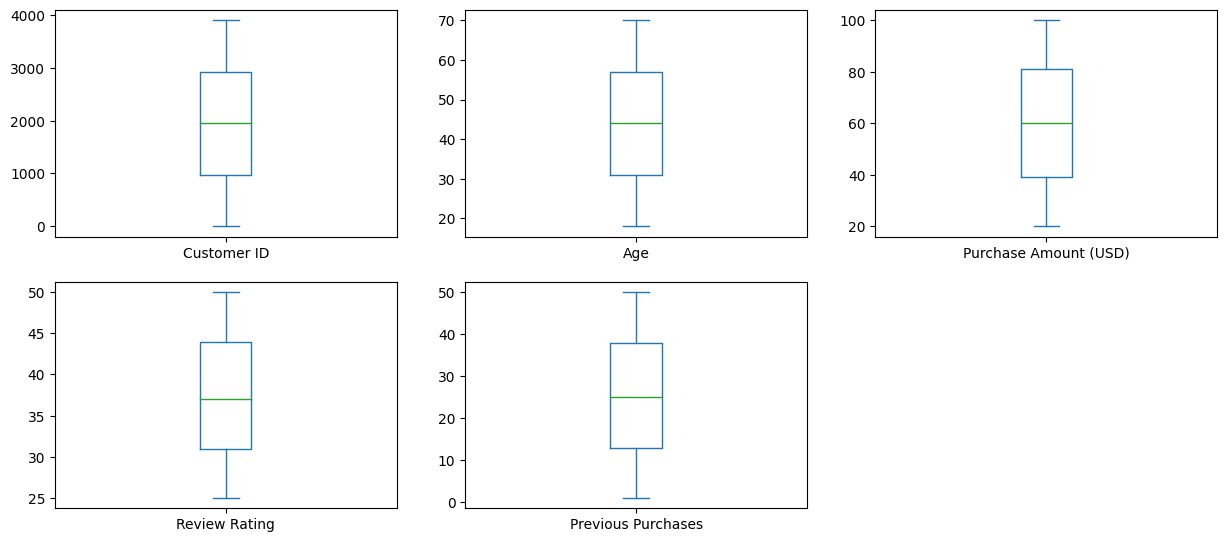

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

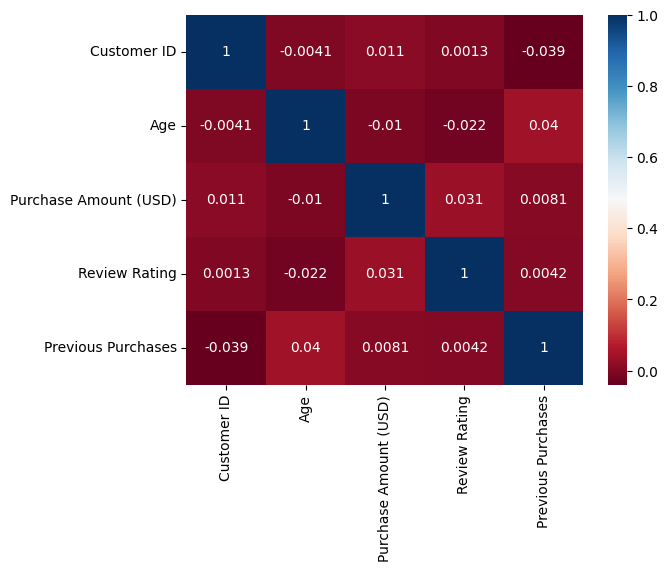

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
#
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

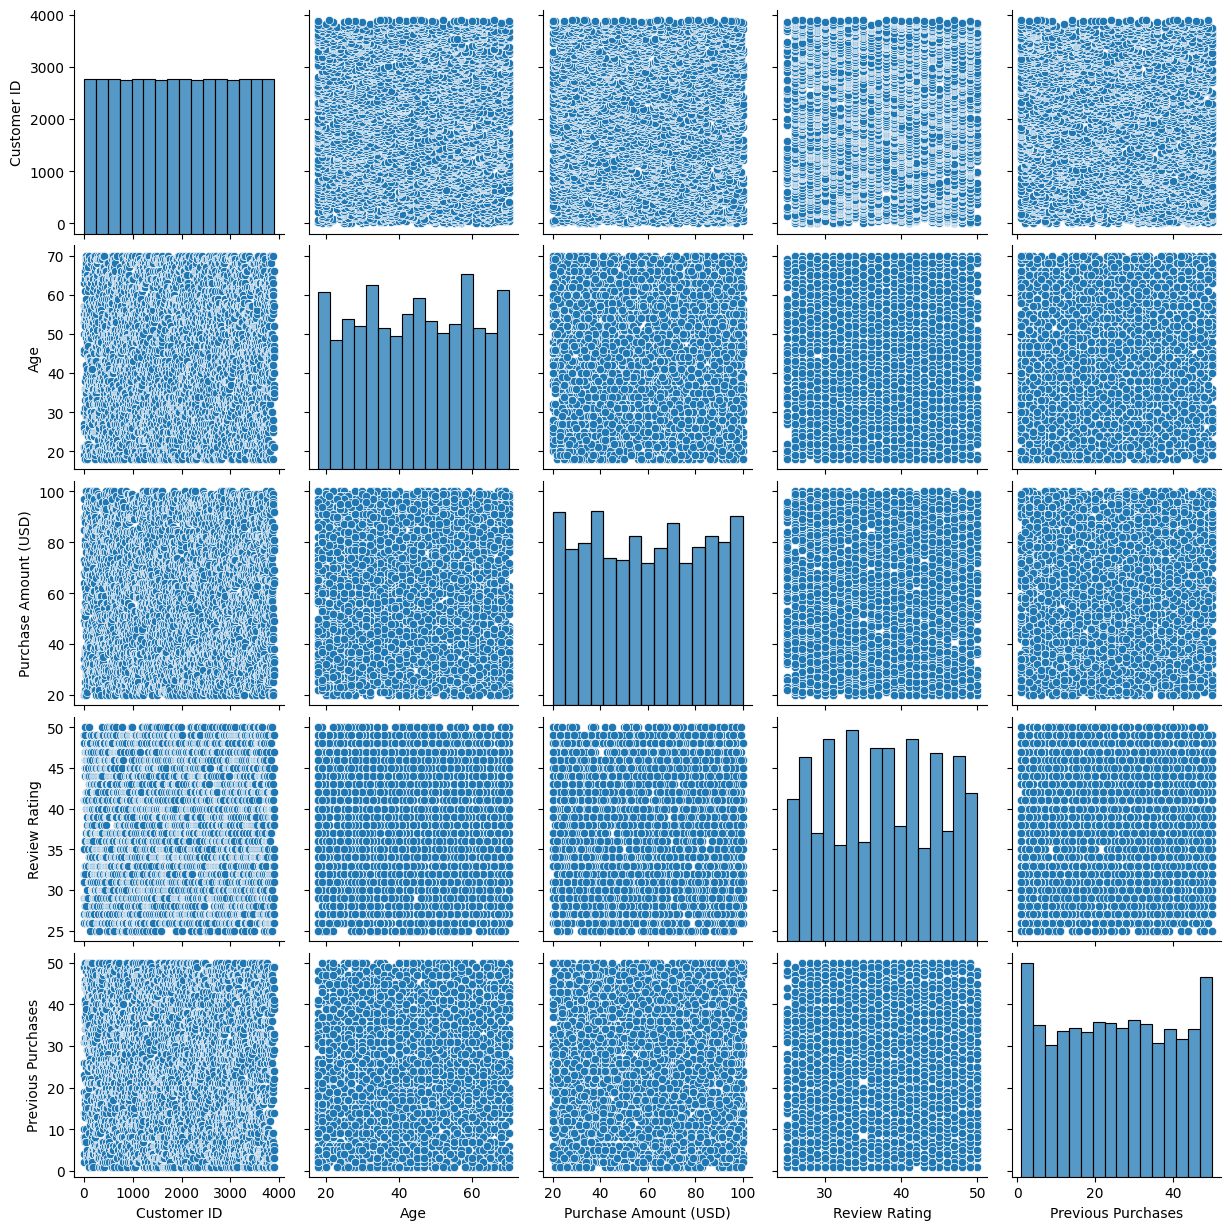

In [ ]:
# Scatter Plot com Seaborn - Variação 1
#
sns.pairplot(dataset)

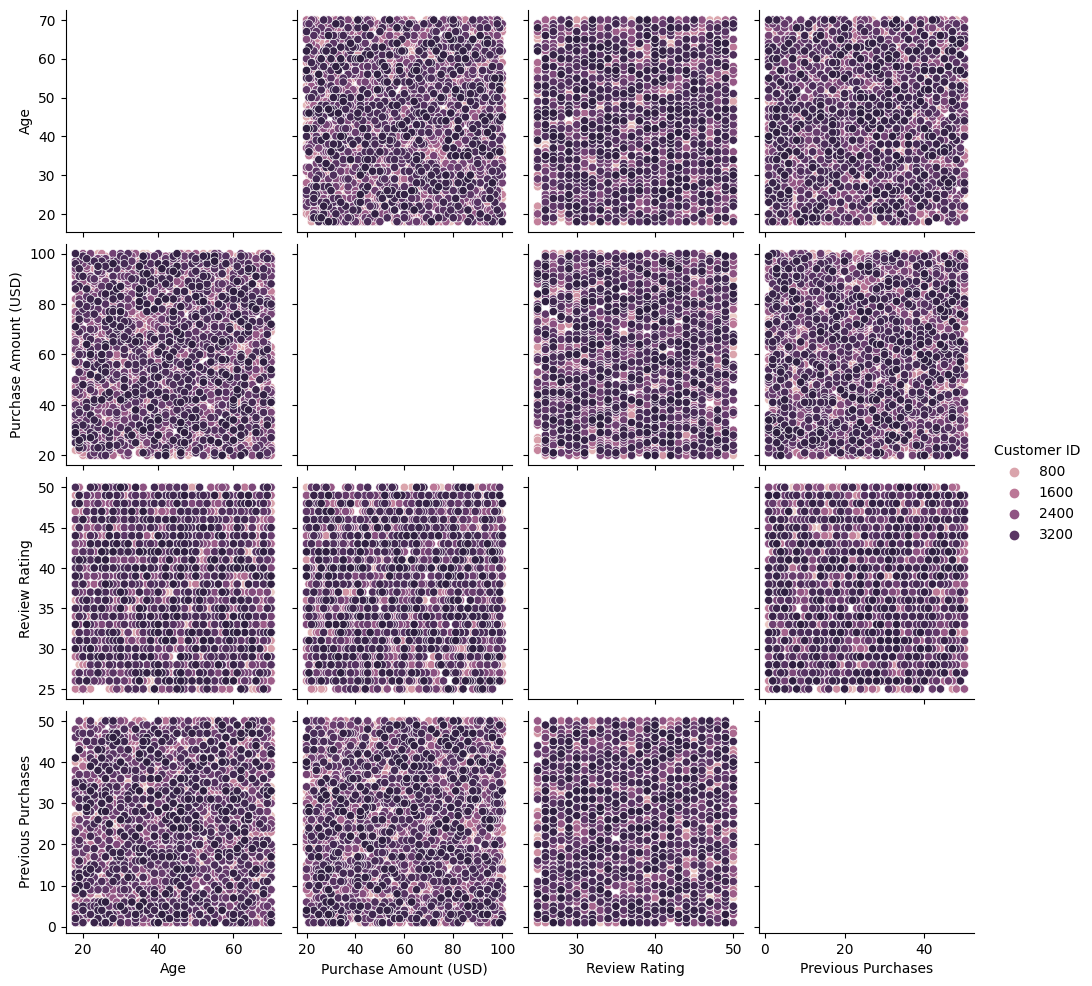

In [ ]:
# Scatter Plot com Seaborn - Variação 2
#
sns.pairplot(dataset, hue = "Customer ID", height = 2.5);

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Sabemos que o datset Diabetes não tem missings aparentes, mas valores "0" que parecem ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

In [ ]:
# Verificando nulls no dataset
#
dataset.isnull().sum()

ID              0
Idade           0
Sexo            0
Item            0
Categoria       0
Valor           0
Local           0
Tam             0
Cor             0
Estacao         0
Nota            0
Fidelidade      0
Envio           0
Desconto        0
Promo           0
Anteriores      0
Metodo Pagto    0
Freq compras    0
dtype: int64

Não existe missing (campos null) no dataset.

Retirando a última coluna do dataset.

<Axes: >

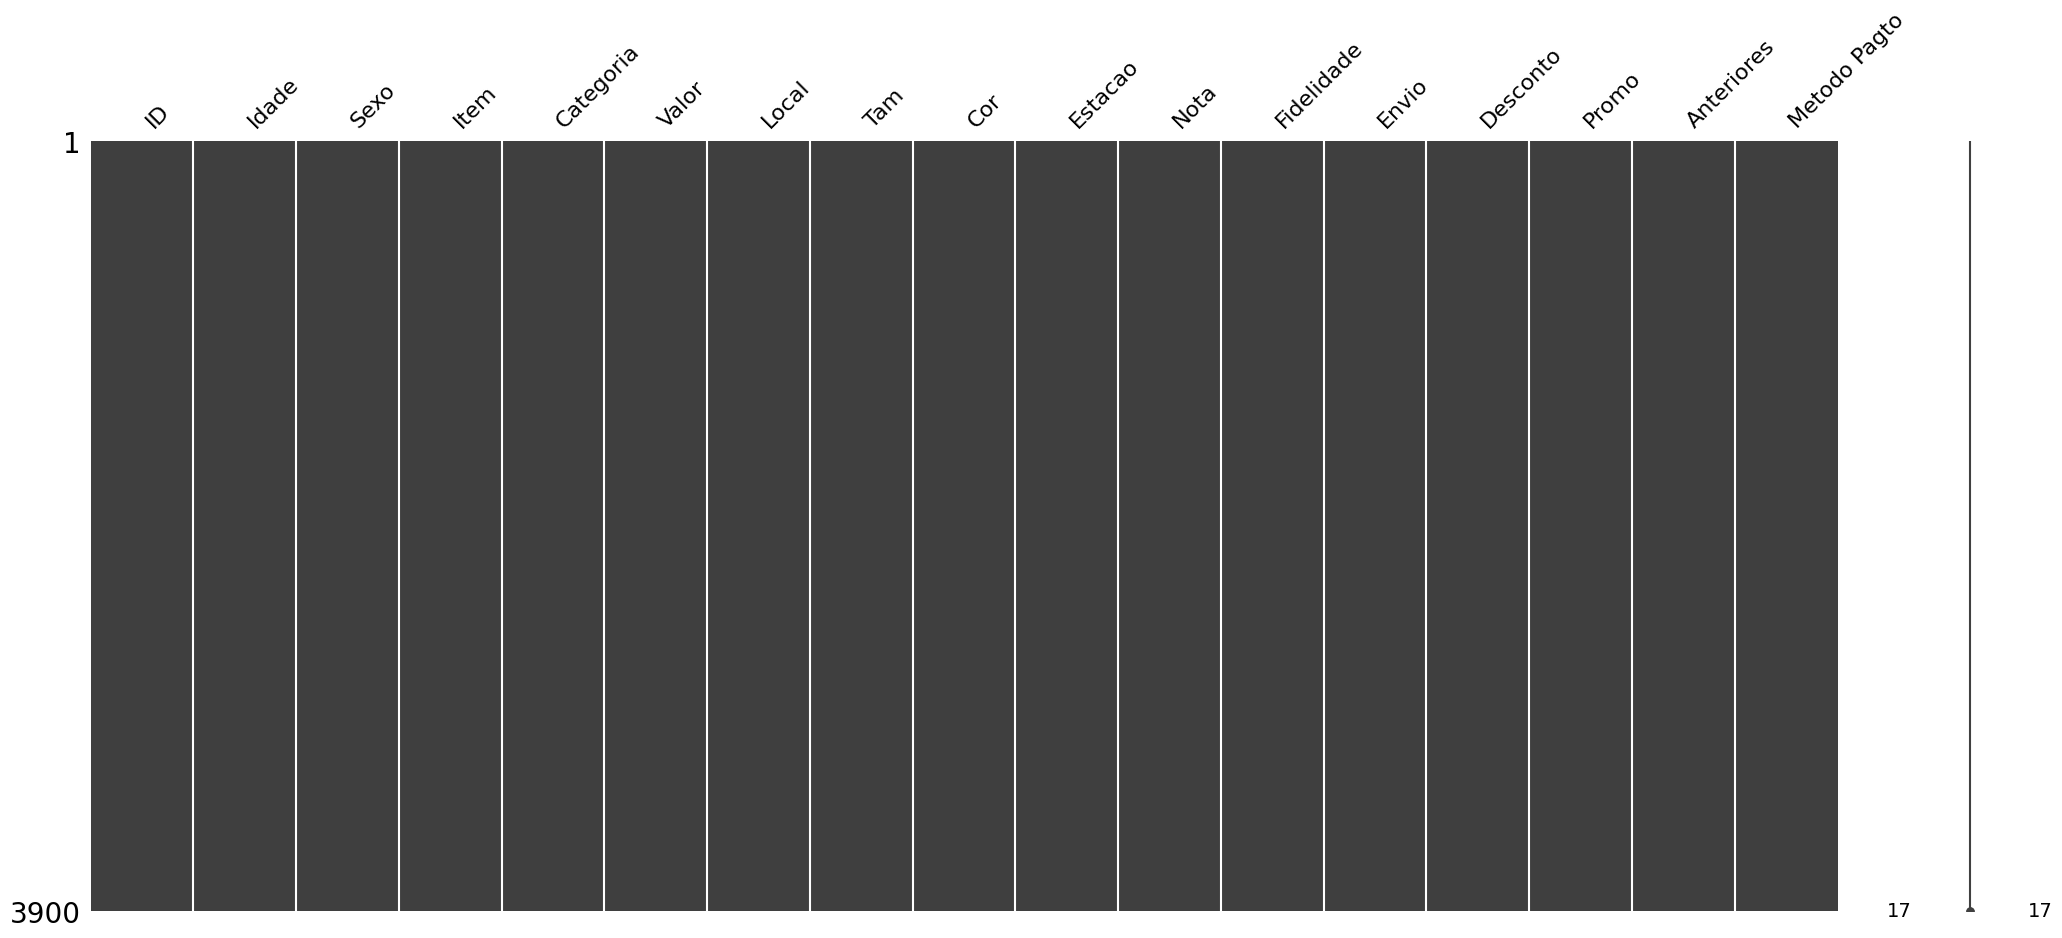

In [ ]:
# salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (Freq compras)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Removendo as colunas 'Fidelidade' e 'Promo'.

<Axes: >

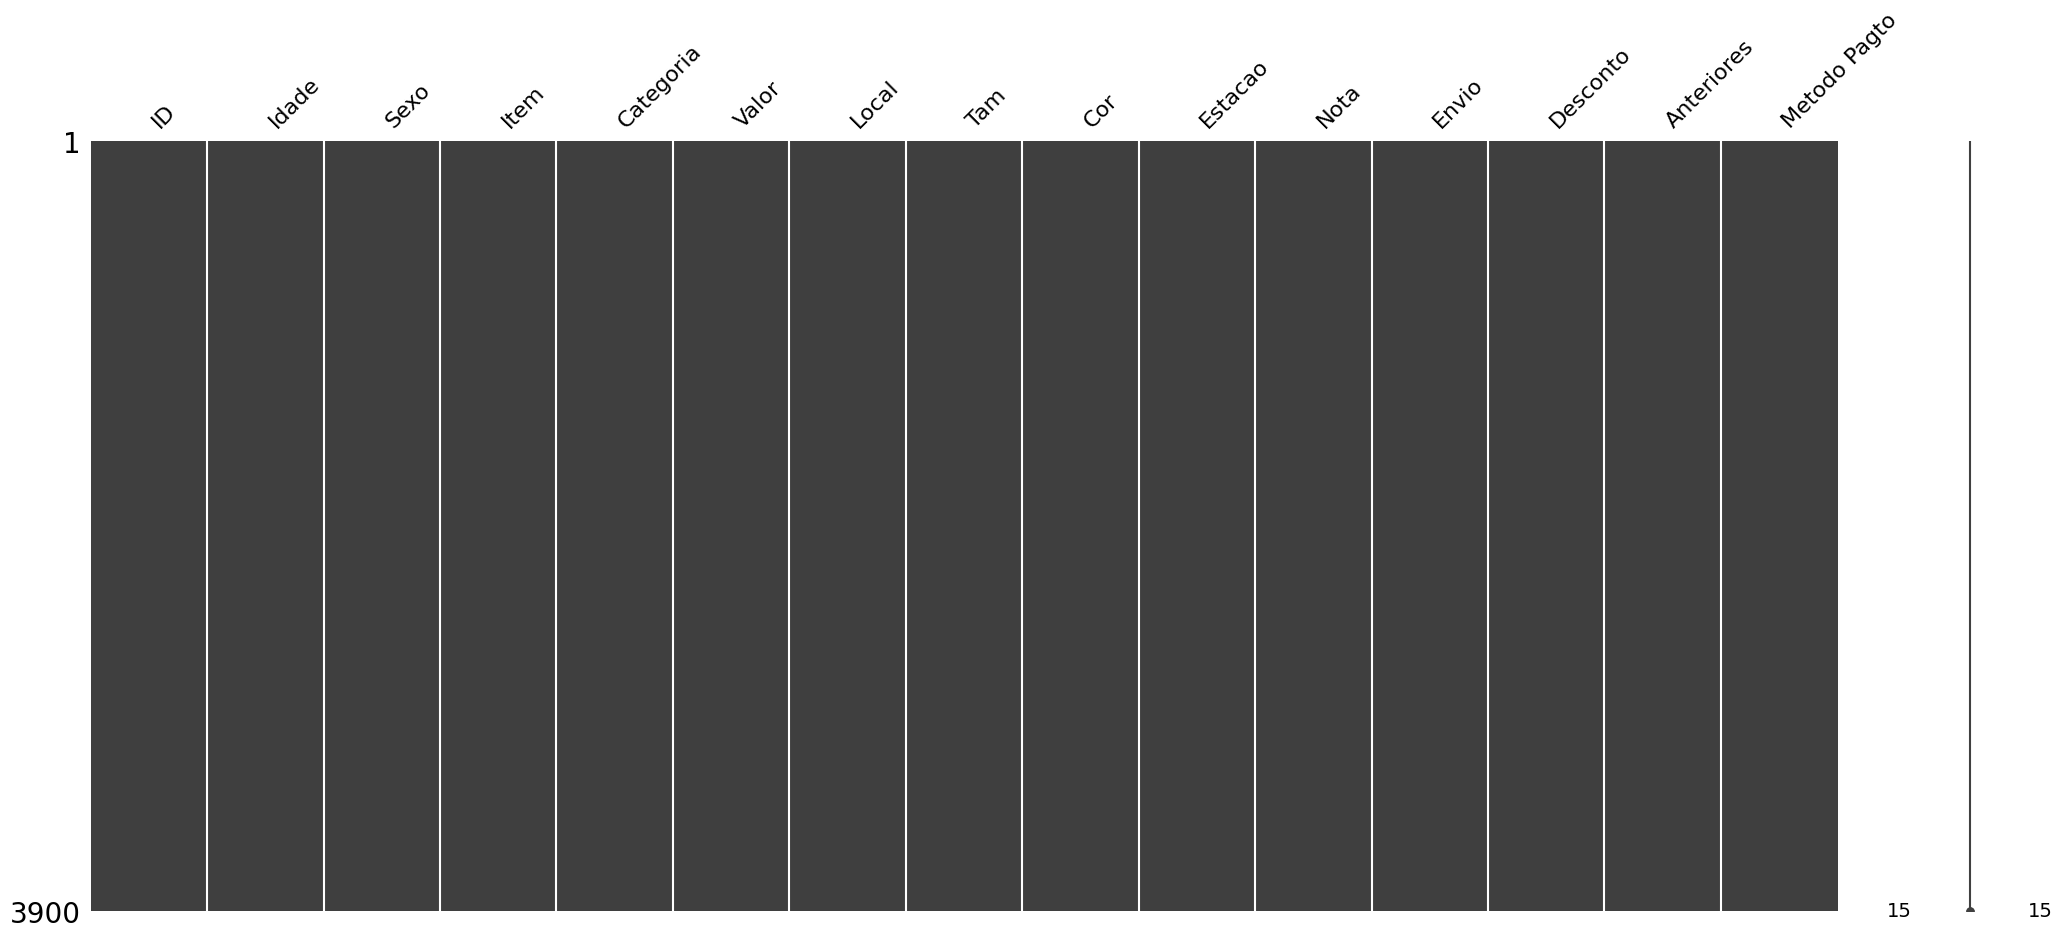

In [ ]:
# removendo as colunas 'Fidelidade' e 'Promo'
atributos.drop(['Fidelidade', 'Promo'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# substituindo os NaN de 'preg' por 0
#atributos['preg'].fillna(0, inplace=True)

# substituindo os NaN de 'plas', 'pres'e 'mass' pela mediana da coluna
#atributos['plas'].fillna(atributos['plas'].median(), inplace=True)
#atributos['pres'].fillna(atributos['pres'].median(), inplace=True)
#atributos['mass'].fillna(atributos['mass'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
#ms.matrix(atributos)

Salvando o dataset antigo e mostrando as primeiras linhas do dataset após a limpeza.

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['ID'] = dataset['ID']

# exibindo as primeiras linhas
datasetSemMissings.head()

,ID,Idade,Sexo,Item,Categoria,Valor,Local,Tam,Cor,Estacao,Nota,Envio,Desconto,Anteriores,Metodo Pagto
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,31,Express,Yes,14,Credit Card
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,31,Express,Yes,2,Bank Transfer
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,31,Free Shipping,Yes,23,Cash
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,35,Next Day Air,Yes,49,PayPal
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,27,Free Shipping,Yes,31,Cash


### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:6]
y_sm = array[:,6]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## Conclusão

Neste MVP foi possível verificar que... [escreva aqui os seu principais achados, pontos de atenção, etc.]